# Project 1: Mandelbrot<br><small>Joshua Nasiatka (2016.12.03)

## Project Background
We investigate the Mandelbrot set, a set of number in the complex plane formed by iterating a complex map and
determining the set of points that is bounded. Here we give some background on this. Before starting this make sure
that you understand basic operations with complex numbers that were given in the course notes (weeks 2 and 3).

## A Mandelbrot Module
To answer the questions below, you should write a Module to do at least the following:  
- A `MandelbrotView` type. This should contain the min and max of the view for a plot of the Mandelbrot set. You may use 2 complex numbers to store these, 4 reals, or other possibilities. You should also have optional parameters for the resulting size of the image.

- An `iterate` function that iterates a general complex function a certain number of times.

- An `is_in_mbset` function that takes a complex number as input and returns true or false depending on if the input is in the mandelbrot set as explained above. Assume that the initial point is `0+0im`.

- A `leaving_number` function that takes a complex number, c as input and returns the number of iterations to leave defined as $|z_n| > 2$. You should use a optional parameter to determine the maximum number of iterations (use 10 as the default) to take and take another optional parameter for the initial point (use `0+0im` as the
default)

- A `plot` function that takes as input a `MandelbrotView` type and produces a plot. It is recommended to create an image similar to that of the complex Newton’s method from class. You should also consider setting the aspect ratio to 1 in this case to avoid stretching out the plot.

- For each of the types and functions, you should check that the parameters are valid.

- Write a Unit test (as a separate file) to test that your types/functions are working as expected. (Note: think of the basics like needed parameters are positive, for example).

## Problem 1:
Find the first ten iterations of the complex map with $x_0 = 0$ and $c = −i$, $0.4 + 0i$, $−0.5 + 0.5i$ and $0.4i$. Which of these values, does the sequence appear to converge? If the sequence doesn’t converge, does it appear that the sequence is bounded?

In [1]:
### check to see if the current directory is in the load path and if not, load it.
if !("." in LOAD_PATH)
    push!(LOAD_PATH,".")
end

using Mandelbrot, Gadfly, Images, Colors, ImageView

In [2]:
arr1 = iterate(-im,10);
arr1[1]

10-element Array{Complex,1}:
 -1-1im
  0+1im
 -1-1im
  0+1im
 -1-1im
  0+1im
 -1-1im
  0+1im
 -1-1im
  0+1im

^ does not converge but is bounded

In [3]:
arr2 = iterate(0.4+0im,10);
arr2[1]

6-element Array{Complex,1}:
     0.56+0.0im
   0.7136+0.0im
 0.909225+0.0im
  1.22669+0.0im
  1.90477+0.0im
  4.02814+0.0im

^ diverges, unbounded

In [4]:
arr3 = iterate(-0.5+0.5im,10);
arr3[1]

10-element Array{Complex,1}:
       -0.5+0.0im      
      -0.25+0.5im      
    -0.6875+0.25im     
 -0.0898438+0.15625im  
  -0.516342+0.471924im 
  -0.456103+0.0126517im
   -0.29213+0.488459im 
  -0.653252+0.214613im 
   -0.11932+0.219608im 
   -0.53399+0.447593im 

^ converges, bounded

In [5]:
arr4 = iterate(0.4im,10);
arr4[1]

10-element Array{Complex,1}:
      -0.16+0.4im     
    -0.1344+0.272im   
 -0.0559206+0.326886im
  -0.103728+0.363441im
   -0.12133+0.324602im
 -0.0906458+0.321232im
 -0.0949735+0.341763im
  -0.107782+0.335083im
  -0.100664+0.327768im
 -0.0972987+0.334011im

^ converges, bounded

## Problem 2:
For each of the sequences in #1, plot the absolute value of the iterations (recall this means the distance from the origin). (Hint: you may want to use a log scale for any that grow very fast and if you use a log scale, throw out the first point which has a distance of 0 and the log of 0 is not defined.)

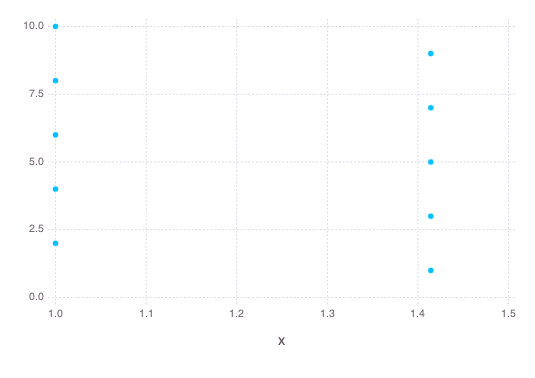

In [6]:
Gadfly.plot(x=map(x->abs(x),arr1[1]),Geom.point)

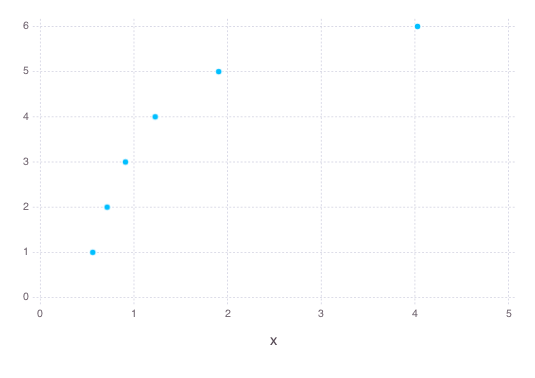

In [7]:
Gadfly.plot(x=map(x->abs(x),arr2[1]),Geom.point)

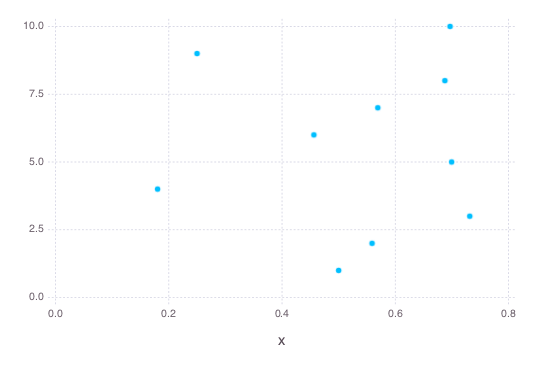

In [8]:
Gadfly.plot(x=map(x->abs(x),arr3[1]),Geom.point)

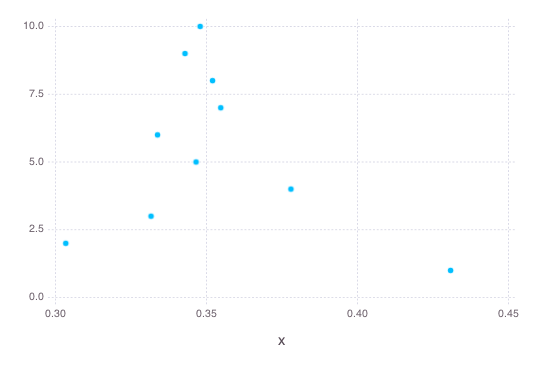

In [9]:
Gadfly.plot(x=map(x->abs(x),arr4[1]),Geom.point)

## Problem 3:
Find the leaving numbers for $c = −i$, $−1.01i$, $0.4 + 0i$, $−0.5 + 0.5i$ and $2i$. If it appears that the sequence is in the Mandelbrot set, return 255.

In [10]:
leaving_number(-im)

255

In [11]:
leaving_number(-1.01im)

8

In [12]:
leaving_number(0.4+0.0im)

7

In [13]:
leaving_number(-0.5+0.5im)

255

In [14]:
leaving_number(2im)

2

## Problem 4:
Create a 400 by 600 array of complex numbers with real values -2 to 1 and imaginary numbers -1 to 1. For each number in the array, return the result from leaving number. Convert the array to unsigned 8-bit integers (`UInt8`), apply a color map and view the image. This should be the standard view of the Mandelbrot set. (Google it if you don’t know what it looks like). Play with the various built-in colormaps or trying creating some of your own. For this problem, you can built up the plot (image).

In [15]:
Z=[(x+y*im) for x=-2:3/399:1, y=1:-2/599:-1]

400×600 Array{Complex{Float64},2}:
     -2.0+1.0im      -2.0+0.996661im  …      -2.0-0.996661im      -2.0-1.0im
 -1.99248+1.0im  -1.99248+0.996661im     -1.99248-0.996661im  -1.99248-1.0im
 -1.98496+1.0im  -1.98496+0.996661im     -1.98496-0.996661im  -1.98496-1.0im
 -1.97744+1.0im  -1.97744+0.996661im     -1.97744-0.996661im  -1.97744-1.0im
 -1.96992+1.0im  -1.96992+0.996661im     -1.96992-0.996661im  -1.96992-1.0im
 -1.96241+1.0im  -1.96241+0.996661im  …  -1.96241-0.996661im  -1.96241-1.0im
 -1.95489+1.0im  -1.95489+0.996661im     -1.95489-0.996661im  -1.95489-1.0im
 -1.94737+1.0im  -1.94737+0.996661im     -1.94737-0.996661im  -1.94737-1.0im
 -1.93985+1.0im  -1.93985+0.996661im     -1.93985-0.996661im  -1.93985-1.0im
 -1.93233+1.0im  -1.93233+0.996661im     -1.93233-0.996661im  -1.93233-1.0im
 -1.92481+1.0im  -1.92481+0.996661im  …  -1.92481-0.996661im  -1.92481-1.0im
 -1.91729+1.0im  -1.91729+0.996661im     -1.91729-0.996661im  -1.91729-1.0im
 -1.90977+1.0im  -1.90977+0.996661im     

In [16]:
Z=[(x+y*im) for x=-2:3/399:1, y=1:-2/599:-1]

400×600 Array{Complex{Float64},2}:
     -2.0+1.0im      -2.0+0.996661im  …      -2.0-0.996661im      -2.0-1.0im
 -1.99248+1.0im  -1.99248+0.996661im     -1.99248-0.996661im  -1.99248-1.0im
 -1.98496+1.0im  -1.98496+0.996661im     -1.98496-0.996661im  -1.98496-1.0im
 -1.97744+1.0im  -1.97744+0.996661im     -1.97744-0.996661im  -1.97744-1.0im
 -1.96992+1.0im  -1.96992+0.996661im     -1.96992-0.996661im  -1.96992-1.0im
 -1.96241+1.0im  -1.96241+0.996661im  …  -1.96241-0.996661im  -1.96241-1.0im
 -1.95489+1.0im  -1.95489+0.996661im     -1.95489-0.996661im  -1.95489-1.0im
 -1.94737+1.0im  -1.94737+0.996661im     -1.94737-0.996661im  -1.94737-1.0im
 -1.93985+1.0im  -1.93985+0.996661im     -1.93985-0.996661im  -1.93985-1.0im
 -1.93233+1.0im  -1.93233+0.996661im     -1.93233-0.996661im  -1.93233-1.0im
 -1.92481+1.0im  -1.92481+0.996661im  …  -1.92481-0.996661im  -1.92481-1.0im
 -1.91729+1.0im  -1.91729+0.996661im     -1.91729-0.996661im  -1.91729-1.0im
 -1.90977+1.0im  -1.90977+0.996661im     

In [17]:
Y=map(x->leaving_number(x),Z)

400×600 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

In [18]:
Y=map(x->UInt8(x),Y)

400×600 Array{UInt8,2}:
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 

In [19]:
colormap("RdBu",256)

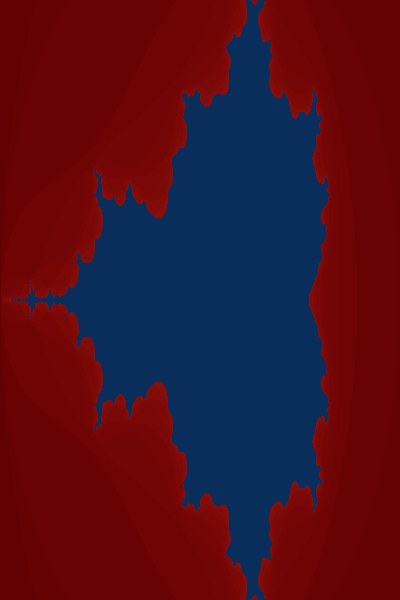

In [20]:
ImageCmap(Y,colormap("RdBu",256))

## Problem 5:
Create the above image using the plot function from your module. It should be called like __`plot(MandelbrotView(-2-im,1+im))`__.

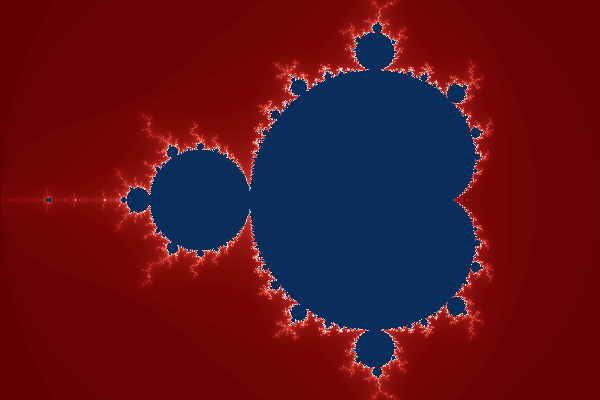

In [21]:
Mandelbrot.plot(MandelbrotView(-2-im,1+im))

## Problem 6:
Plot the Mandelbrot set for $z = x + iy$ for $0 ≤ x ≤ 1$ and $0 ≤ y ≤ 1$.  
Note: make sure that you have the plot oriented correctly.

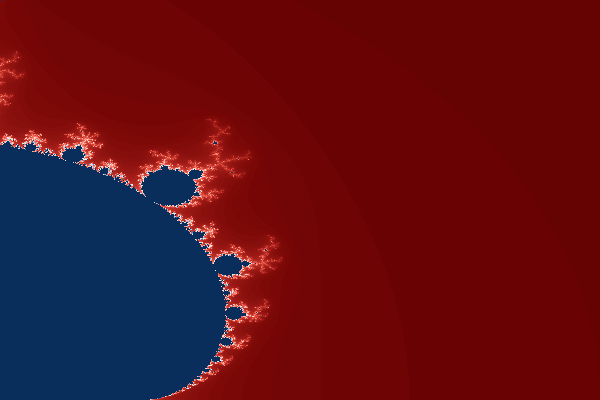

In [22]:
Mandelbrot.plot(MandelbrotView(0+0im,1+im))

## Problem 7:
Once you have #5 and #6 finished, try finding at least 4 interesting regions of the Mandelbrot set to plot. Zooming in around the edges of the set usually produce interesting results.

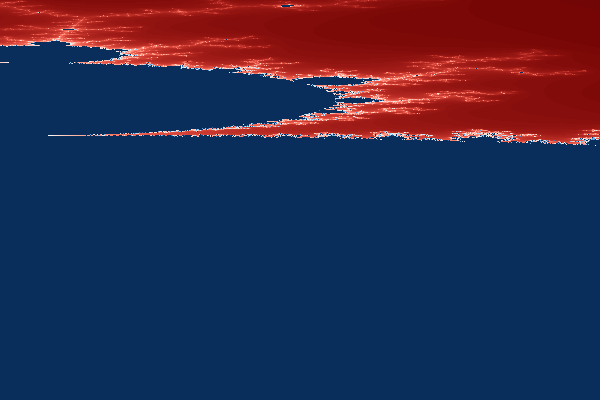

In [23]:
Mandelbrot.plot(MandelbrotView(-0.125-0.034im,.045+1im)) # Thought this *3D* plot was cool

In [24]:
#plot_zoom(MandelbrotView(-2-im,1+im),55.95,75,.005) # Was a cool plot, changed function so this stopped working

In [25]:
#plot_zoom(MandelbrotView(-2-im,1+im),14,-27.75,15) # Was a cool plot, changed function so this stopped working

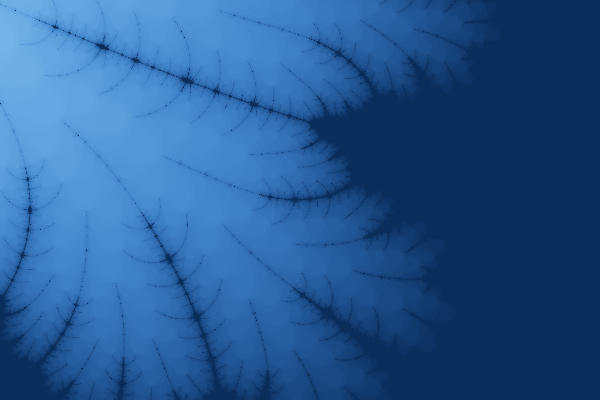

In [26]:
plot_zoom(MandelbrotView(-2-im,1+im),.000005,-1.78632,999995)

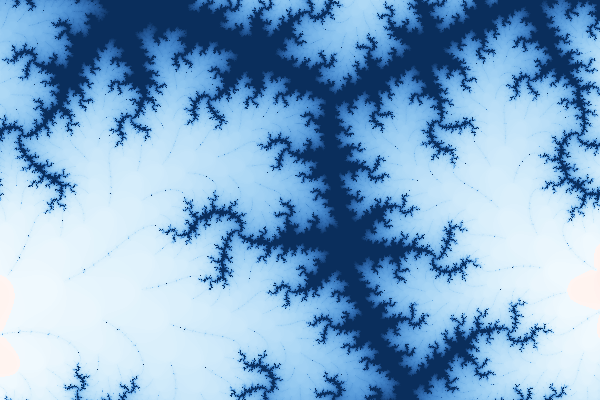

In [27]:
plot_zoom(MandelbrotView(-2-im,1+im),-.01493,-1.75583,55000)

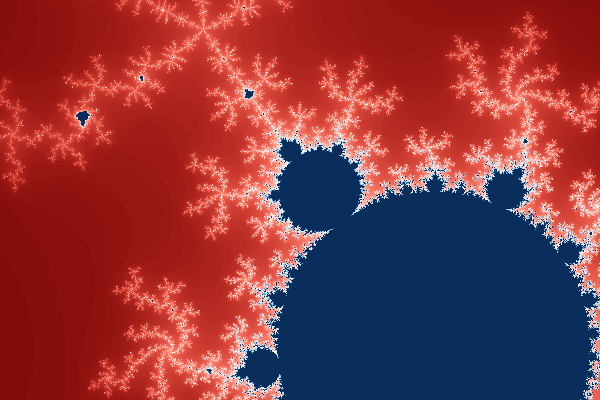

In [28]:
plot_zoom(MandelbrotView(-2-im,1+im),.6,-.513,20)

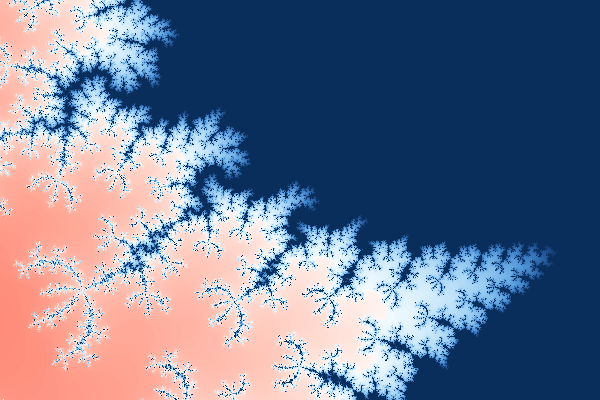

In [29]:
plot_zoom(MandelbrotView(-2-im,1+im),.61,-.541,750)

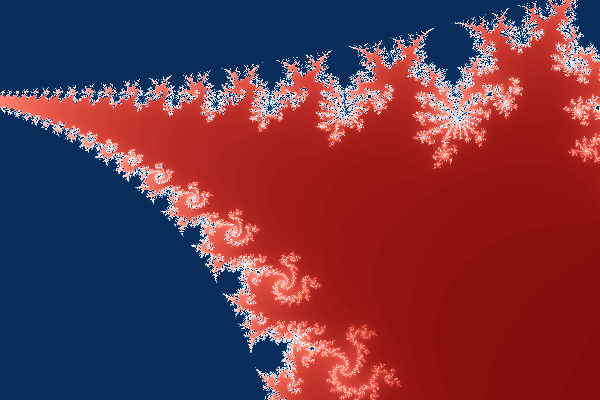

In [30]:
plot_zoom(MandelbrotView(-2-im,1+im),-.675,-.0005,21.1)

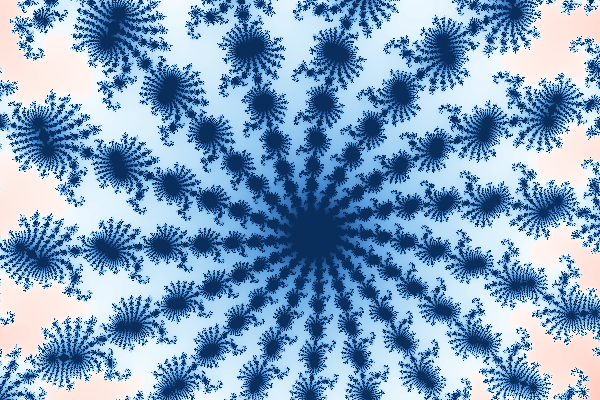

In [31]:
plot_zoom(MandelbrotView(-2-im,1+im),-.6542,-.01295,1500)

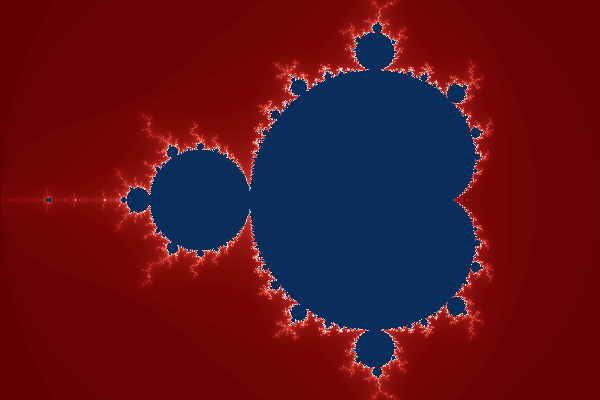

In [32]:
plot_zoom(MandelbrotView())

## Final Testing
To wrap this up, let's make sure that everything constructs and works accordingly by running a test file

In [33]:
include("mandelbrot_test.jl")

Test Summary:    | Pass  Total
  Mandelbrot Tests |    7      7


Base.Test.DefaultTestSet("Mandelbrot Tests",Any[Base.Test.DefaultTestSet("Mandelbrot Constructor",Any[Test Passed
  Expression: isa(m1,MandelbrotView),Test Passed
  Expression: isa(m2,MandelbrotView)],false),Base.Test.DefaultTestSet("In Mandelbrot Set",Any[Test Passed
  Expression: is_in_mbset(n1),Test Passed
  Expression: !(is_in_mbset(n2)),Test Passed
  Expression: !(is_in_mbset(n3)),Test Passed
  Expression: is_in_mbset(n4),Test Passed
  Expression: !(is_in_mbset(n5))],false)],false)